In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "numServer_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="influxdb",
                  trial=trial)
df

,level_0,index,query_latency_max,query_latency_mean,query_latency_min,query_latency_50pc,query_latency_75pc,query_latency_95pc,query_latency_99pc,numServerInstance,...,fieldPerPoint,clientConcurrency,duration,shardDuration,numMeasurement,tagCard,writeConsistency,debug,avg_client_server_lat,tenancy
0,0,0,0.655247,0.633939,0.614302,0.632720,0.641285,0.655247,0.655247,1,...,1,1,10,7d,1,"10,10,10",any,False,73.00,dedicated
1,1,1,0.694403,0.668810,0.631062,0.675510,0.679933,0.694403,0.694403,1,...,1,1,10,7d,1,"10,10,10",any,False,90.00,dedicated
2,2,2,0.661870,0.641070,0.618893,0.636858,0.656033,0.661870,0.661870,1,...,1,1,10,7d,1,"10,10,10",any,False,84.00,dedicated
3,3,3,0.683750,0.651836,0.626617,0.648047,0.663907,0.683750,0.683750,1,...,1,1,10,7d,1,"10,10,10",any,False,93.00,dedicated
4,4,4,0.699752,0.679207,0.659895,0.678815,0.688227,0.699752,0.699752,1,...,1,1,10,7d,1,"10,10,10",any,False,73.00,dedicated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,0.344625,0.319955,0.301312,0.317545,0.322915,0.344625,0.344625,10,...,1,1,10,7d,1,"10,10,10",any,False,86.00,dedicated
196,196,196,0.341307,0.315156,0.295900,0.316713,0.321748,0.341307,0.341307,10,...,1,1,10,7d,1,"10,10,10",any,False,86.25,dedicated
197,197,197,0.363135,0.324804,0.302017,0.316520,0.335608,0.363135,0.363135,10,...,1,1,10,7d,1,"10,10,10",any,False,86.00,dedicated
198,198,198,0.358997,0.326827,0.294190,0.326420,0.339313,0.358997,0.358997,10,...,1,1,10,7d,1,"10,10,10",any,False,80.00,dedicated


adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+----------+------+-----+-----+------+-------+-----+------+--------+-------+
|  False   |  lr  | knn |  rf | svm  | svm_k |  nn | best | oracle | naive |
+----------+------+-----+-----+------+-------+-----+------+--------+-------+
| influxdb | 14.0 | 2.3 | 2.3 | 13.7 |  13.2 | 2.2 | 2.2  |  2.0   |  18.6 |
+----------+------+-----+-----+------+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | 9.0 | 10.0 |
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+
|   influxdb   | 2.9 | 3.1 | 2.1 | 1.7 | 1.6 | 1.6 | 1.6 | 0.9 | 1.4 | 1.8  |
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+


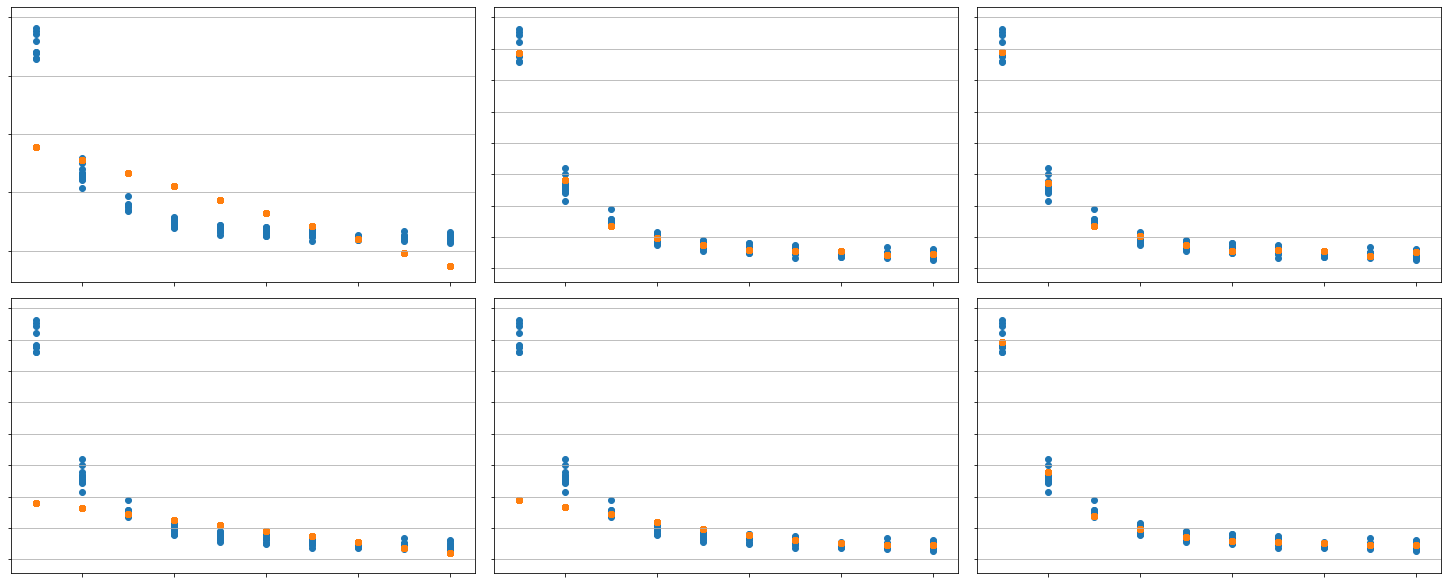

In [7]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "influxdb"
ctx["feature"] = ctx["feature_mode"] = ["numServerInstance"]
ctx["target_feature"] = "query_latency_mean"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"influxdb": df})

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+----------+------+-----+-----+-----+-------+-----+------+--------+-------+
|  False   |  lr  | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+----------+------+-----+-----+-----+-------+-----+------+--------+-------+
| influxdb | 12.9 | 3.0 | 2.9 | 4.5 |  4.5  | 5.2 | 2.9  |  2.8   |  17.6 |
+----------+------+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | 9.0 | 10.0 |
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+
|   influxdb   | 3.1 | 4.5 | 1.9 | 2.8 | 3.4 | 1.6 | 1.9 | 1.6 | 1.7 | 3.0  |
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+


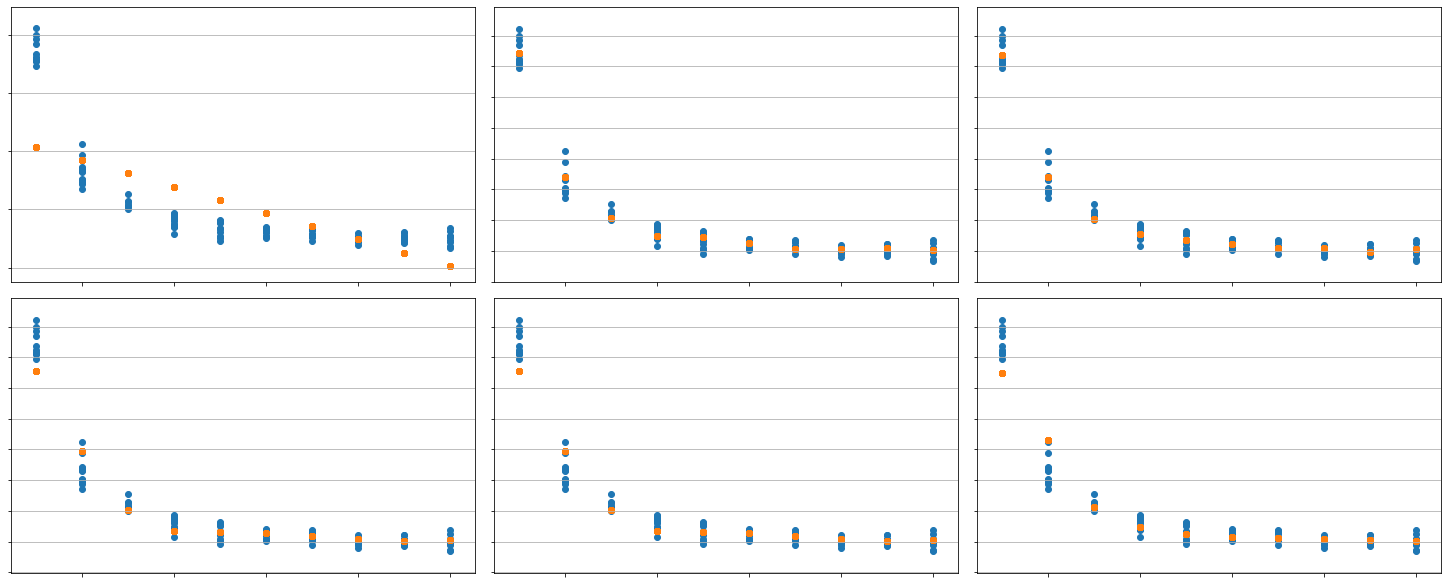

In [8]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "influxdb"
ctx["feature"] = ctx["feature_mode"] = ["numServerInstance"]
ctx["target_feature"] = "query_latency_99pc"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"influxdb": df})